In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Read the Clean Data CSV file
processedData = pd.read_csv('./data/eng_data.csv')

print(processedData.head().to_markdown())

|    | gender   |   age | product_category   |   quantity |   price_per_unit |   total_amount |   year | month    |   day | dayOfWeek   | age_group   |
|---:|:---------|------:|:-------------------|-----------:|-----------------:|---------------:|-------:|:---------|------:|:------------|:------------|
|  0 | Male     |    34 | Beauty             |          3 |               50 |            150 |   2023 | November |    24 | Friday      | 30-39       |
|  1 | Female   |    26 | Clothing           |          2 |              500 |           1000 |   2023 | February |    27 | Monday      | 20-29       |
|  2 | Male     |    50 | Electronics        |          1 |               30 |             30 |   2023 | January  |    13 | Friday      | 40-49       |
|  3 | Male     |    37 | Clothing           |          1 |              500 |            500 |   2023 | May      |    21 | Sunday      | 30-39       |
|  4 | Male     |    30 | Beauty             |          2 |               50 |          

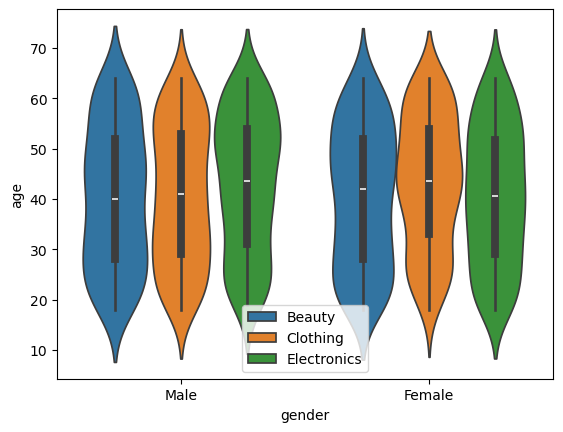

In [20]:
sns.violinplot(data=processedData, x='gender', y='age', hue='product_category', legend=True)
plt.legend(loc='lower center')
plt.show()

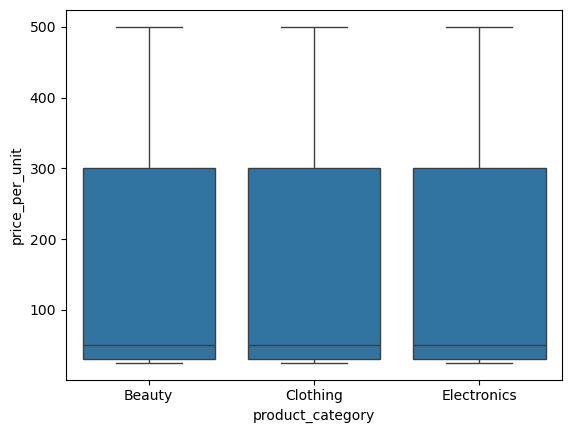

In [22]:
sns.boxplot(data=processedData, x='product_category', y='price_per_unit')
plt.show()

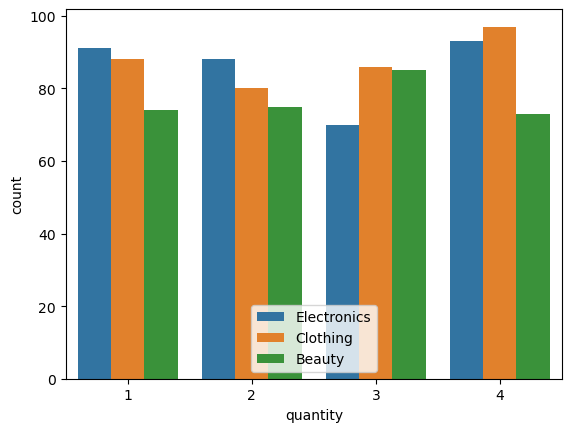

In [25]:
sns.countplot(data=processedData, x='quantity', hue='product_category')
plt.legend(loc='lower center')
plt.show()

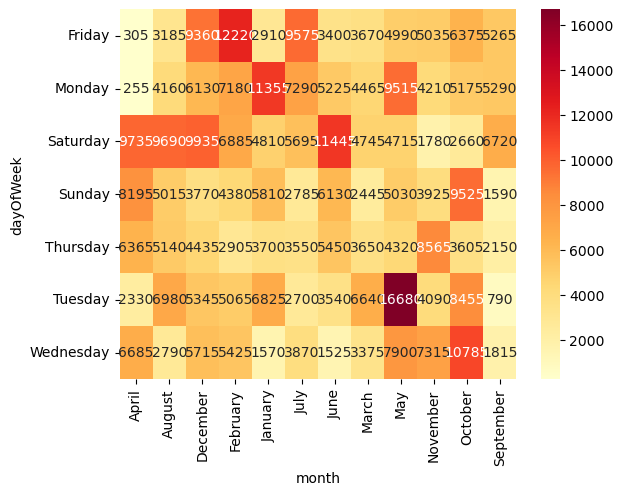

In [27]:
pivot_table = processedData.pivot_table(values='total_amount', index='dayOfWeek', columns='month', aggfunc='sum')
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.show()

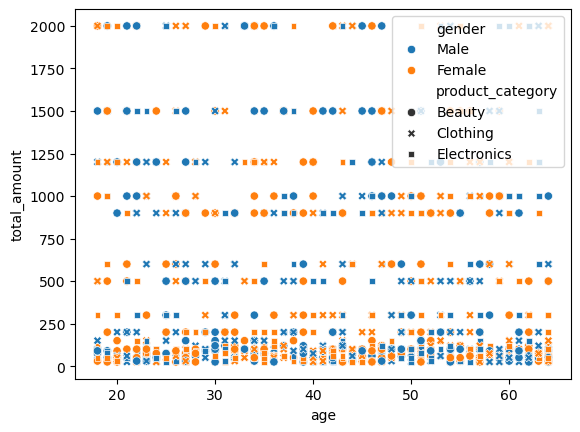

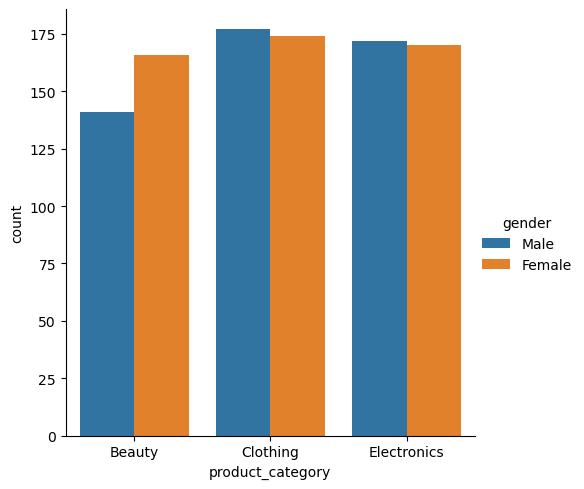

In [29]:
# Age and spending relationship
sns.scatterplot(data=processedData, x='age', y='total_amount', hue='gender', style='product_category')
plt.show()

# Gender distribution across categories
sns.catplot(data=processedData, x='product_category', hue='gender', kind='count')
plt.show()


In [ ]:
sns.pairplot(processedData, kind='reg', plot_kws={'line_kws': {'color': 'red'}})

In [ ]:
sns.displot(processedData, x='price_per_unit', col='quantity', row='product_category', facet_kws=dict(margin_titles=True))